data source = https://www.kaggle.com/datasets/camnugent/sandp500

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### In this analysis, I am gooing to analyze stocks of Apple, Google, Microsoft and Amazon

In [5]:
path = r'/Users/afni/Desktop/Portfolio projects/TimeSeriesData_Analysis/stock_market_dataset/individual_stocks_5yr'
companies = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
dfs = pd.DataFrame()

for file in companies:
    current_df = pd.read_csv(path+'/'+file)
    dfs = pd.concat([dfs, current_df])
    
dfs.shape

(4752, 7)

In [6]:
dfs.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
dfs.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

'date' column data type is object data type, so we need to change this column data type to datetime data type.

In [8]:
dfs['date']=pd.to_datetime(dfs['date'])

In [11]:
dfs.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

### 1) Analyzing closing price of all stocks
Closing price generally refers to the last price at which a stock trades during a regular trading session.

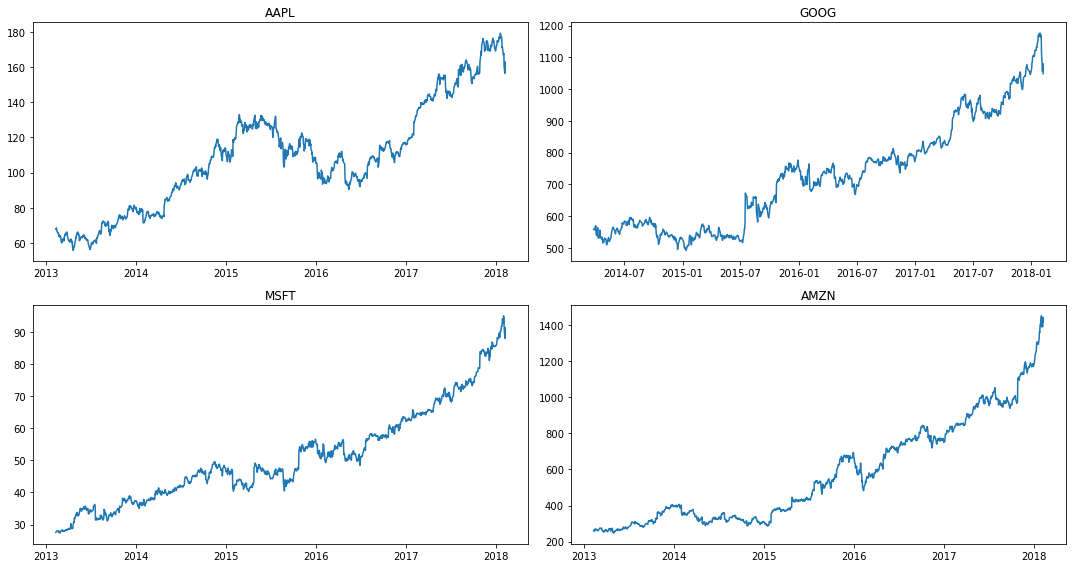

In [15]:
company_list = dfs['Name'].unique()

plt.figure(figsize=(15,8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    df=dfs[dfs['Name']==company]
    plt.plot(df['date'], df['close'])
    plt.title(company)
plt.tight_layout()

### 2) Total volume of stock being traded each day
Volume of stock is the number of shares traded in a company's stock or in an entire market over a specified period, typically a day.
Unusual market activity, either higher or lower than average, is typically the result of some external event. But unusual activity in an individual stock reflects new information about that stock or the stock's sector.

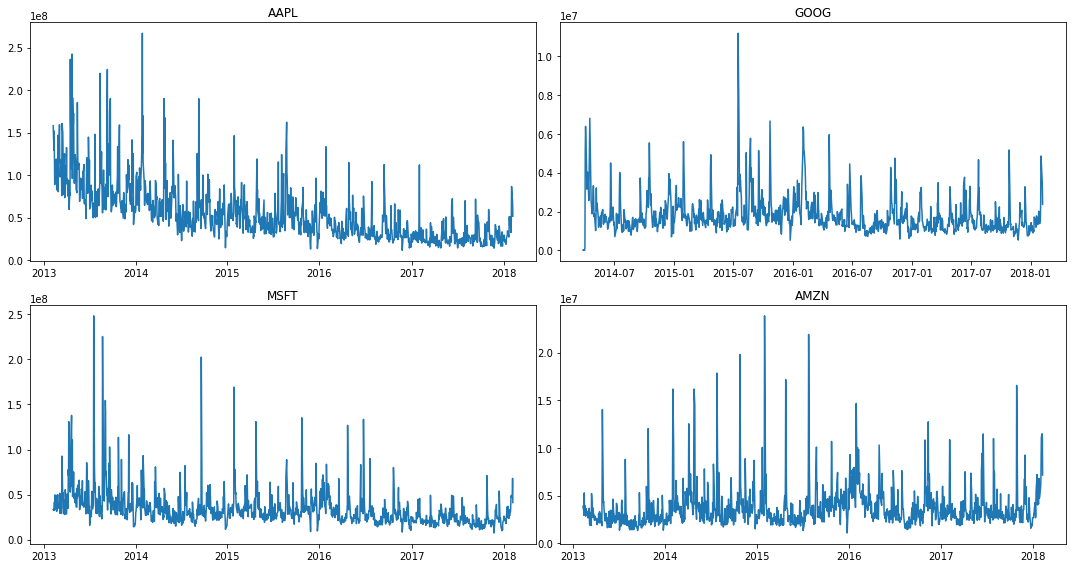

In [17]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    df=dfs[dfs['Name']==company]
    plt.plot(df['date'], df['volume'])
    plt.title(company)
plt.tight_layout()

In [18]:
#Visualize with plotly for more detail

import plotly.express as px

for company in (company_list):
    df=dfs[dfs['Name']==company]
    fig = px.line(df,x='date',y='volume',title=company)
    fig.show()

### 3) Daily price change in stock

#### Daily Stock Return Formula
To calculate how much we gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares we own in the company.

In [19]:
df2 = dfs.copy()

#### Percentage return

In [20]:
df2['1day % return']=((df2['close']-df2['open'])/df2['close'])*100
df2.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


In [21]:
for company in (company_list):
    df=df2[df2['Name']==company]
    fig = px.line(df,x='date',y='1day % return',title=company)
    fig.show()

### 4) Monthly & yearly mean of closing price

#### 4.1) Monthly mean of closing price

In [22]:
df2.set_index('date', inplace=True)
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


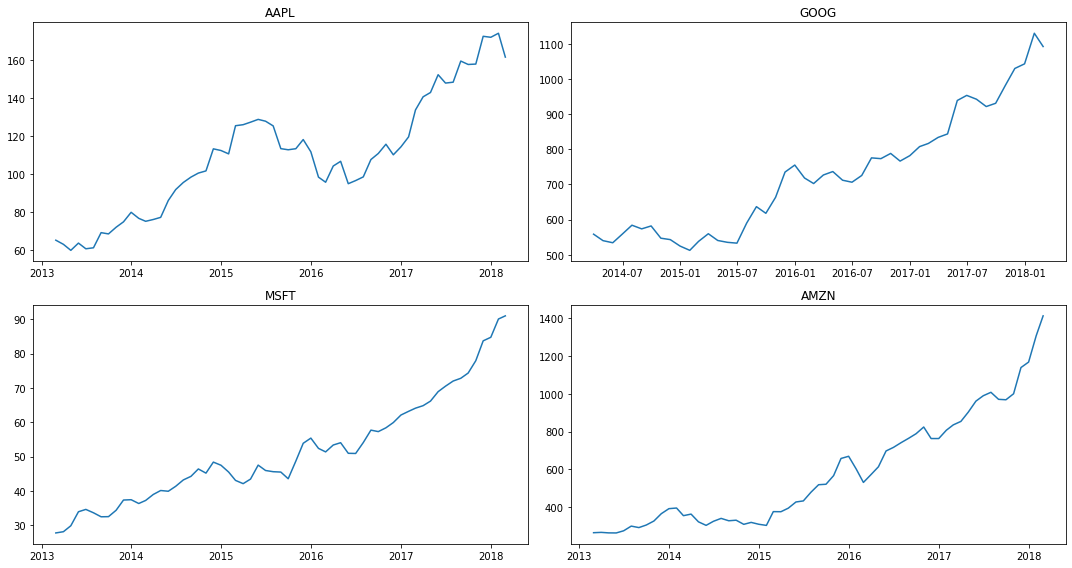

In [28]:
company_list = df2['Name'].unique()

plt.figure(figsize=(15,8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    df=df2[df2['Name']==company]
    plt.plot(df['close'].resample('M').mean())
    plt.title(company)
plt.tight_layout()

#### 4.2) Monthly mean of closing price

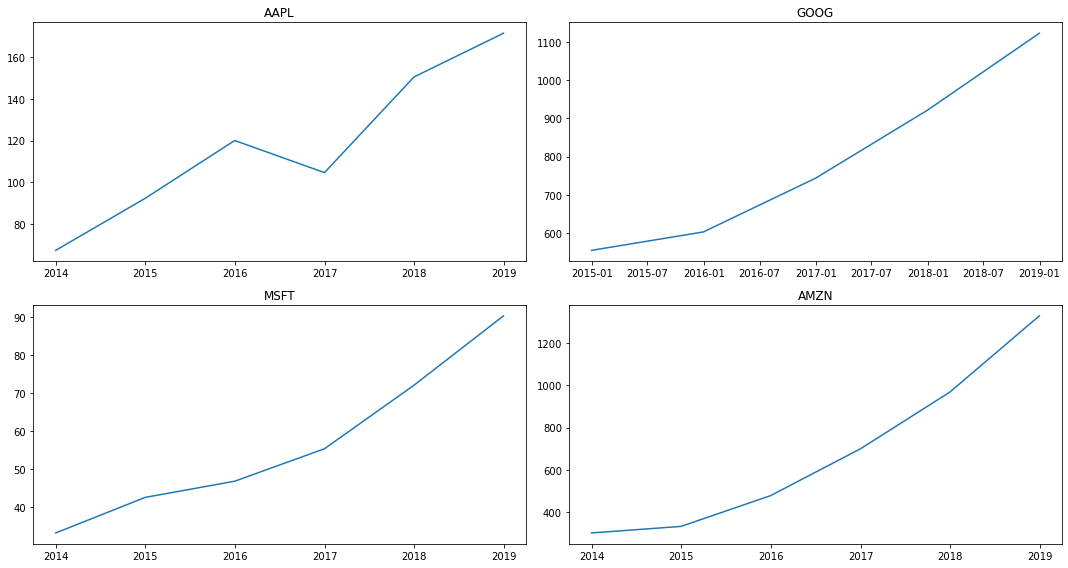

In [29]:
company_list = df2['Name'].unique()

plt.figure(figsize=(15,8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    df=df2[df2['Name']==company]
    plt.plot(df['close'].resample('Y').mean())
    plt.title(company)
plt.tight_layout()

### 5) Check the correlation of closing price among these tech companies

In [31]:
dfs.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [32]:
dfs[dfs['Name']=='AAPL']

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [33]:
# Separating all the stocks and make new Data Frame
apple = pd.DataFrame()
apple = dfs[dfs['Name']=='AAPL']
google = pd.DataFrame()
google = dfs[dfs['Name']=='GOOG']
amazon = pd.DataFrame()
amazon = dfs[dfs['Name']=='AMZN']
micr = pd.DataFrame()
micr = dfs[dfs['Name']=='MSFT']

In [34]:
# Data Frame for closing price of each stock
close = pd.DataFrame()
close['aapl']=apple['close']
close['goog']=google['close']
close['amzn']=amazon['close']
close['msft']=micr['close']
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


## Multi-variate Analysis
- Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them.
- It helps companies predict future outcomes, improve efficiency, make decisions about policies and processes, correct errors, and gain new insights.
- It builds upon univariate (one variable) analysis and bivariate (two variable) analysis.
- The more a company invests in ensuring quality data collection, the more accurate multivariate analysis will be.


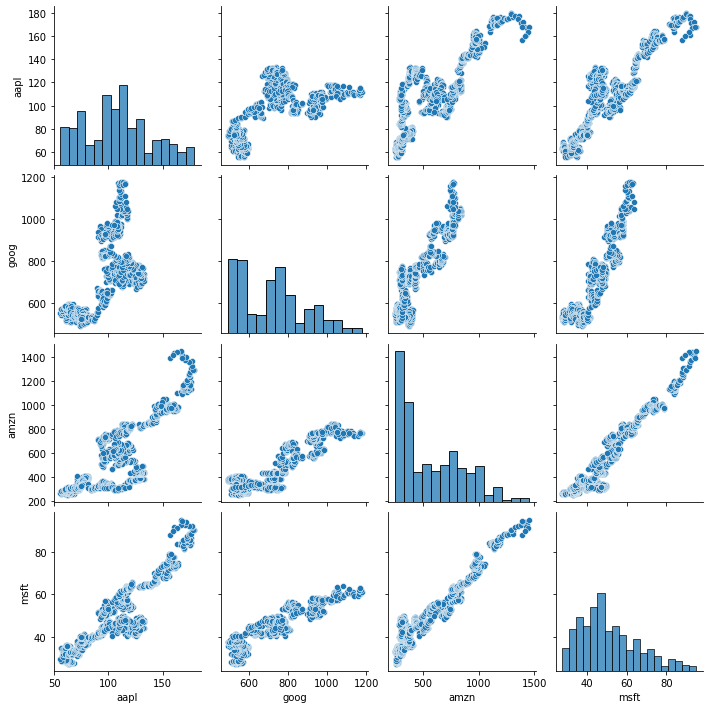

In [35]:
sns.pairplot(data=close)

<AxesSubplot:>

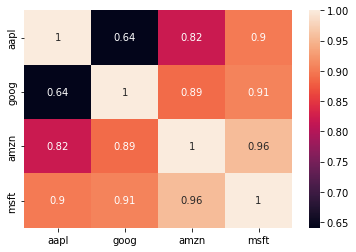

In [37]:
# Correlation plot for stock prices
sns.heatmap(close.corr(), annot=True)

- Closing price of Google and Microsoft are well correlated (Correlation = 0.91)
- Closing price of Amazon and Microsoft have a correlation of 0.96